In [32]:
import os
import pandas as pd 

# Путь к папке, содержащей ваши CSV файлы
main_folder = 'F:\\Projects\\Python_projects\\Alex\\Data Science\\homework\\data'

# Список папок внутри главной папки
subfolders = ['idle', 'running', 'stairs', 'walking']

# Пустой список для хранения данных из файлов
all_data = []

# Цикл для загрузки данных из каждой папки
for folder in subfolders:
    folder_path = os.path.join(main_folder, folder)
    # Получение списка файлов в папке
    files = os.listdir(folder_path)
    # Цикл для загрузки данных из каждого файла CSV
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(folder_path, file)
            # Загрузка данных из CSV файла в DataFrame
            data = pd.read_csv(file_path)
            # Заполнение пропущенных значений средними значениями по столбцам
            data.fillna(data.mean(), inplace=True)
            # Добавление данных в список
            all_data.append(data)

# Объединение всех DataFrame в один общий DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# Просмотр первых нескольких строк объединенных данных
print(combined_data.head())
print(combined_data.isnull().sum())
print(combined_data.dtypes)
print(combined_data.describe())


   accelerometer_X  accelerometer_Y  accelerometer_Z
0         1.000776         4.616021         8.576031
1         0.718261         4.209007         8.446744
2        -0.909797        -0.282516         9.203311
3         5.099650         0.148441         8.418014
4         1.762132        -0.162806         9.251195
accelerometer_X    0
accelerometer_Y    0
accelerometer_Z    0
dtype: int64
accelerometer_X    float64
accelerometer_Y    float64
accelerometer_Z    float64
dtype: object
       accelerometer_X  accelerometer_Y  accelerometer_Z
count    193860.000000    193860.000000    193860.000000
mean          1.923550         1.598343         1.804896
std           8.404867        12.474041         7.191590
min         -39.188293       -39.188293       -39.188293
25%          -2.494758        -8.327033        -2.494758
50%           0.248997        -0.009577         0.905008
75%           4.668694         8.671799         7.187394
max          39.188293        39.188293        39.18829

In [33]:
# Расчет временных признаков
time_features = pd.DataFrame()

# Среднее значение по каждой оси
time_features['mean_X'] = [combined_data['accelerometer_X'].mean()]
time_features['mean_Y'] = [combined_data['accelerometer_Y'].mean()]
time_features['mean_Z'] = [combined_data['accelerometer_Z'].mean()]

# Стандартное отклонение по каждой оси
time_features['std_X'] = [combined_data['accelerometer_X'].std()]
time_features['std_Y'] = [combined_data['accelerometer_Y'].std()]
time_features['std_Z'] = [combined_data['accelerometer_Z'].std()]

# Минимальное и максимальное значение по каждой оси
time_features['min_X'] = [combined_data['accelerometer_X'].min()]
time_features['min_Y'] = [combined_data['accelerometer_Y'].min()]
time_features['min_Z'] = [combined_data['accelerometer_Z'].min()]
time_features['max_X'] = [combined_data['accelerometer_X'].max()]
time_features['max_Y'] = [combined_data['accelerometer_Y'].max()]
time_features['max_Z'] = [combined_data['accelerometer_Z'].max()]

# Различные процентили
percentiles = [25, 50, 75]
for p in percentiles:
    time_features[f'percentile_{p}_X'] = [combined_data['accelerometer_X'].quantile(p/100)]
    time_features[f'percentile_{p}_Y'] = [combined_data['accelerometer_Y'].quantile(p/100)]
    time_features[f'percentile_{p}_Z'] = [combined_data['accelerometer_Z'].quantile(p/100)]

# Вывод полученных временных признаков
print(time_features)

    mean_X    mean_Y    mean_Z     std_X      std_Y    std_Z      min_X  \
0  1.92355  1.598343  1.804896  8.404867  12.474041  7.19159 -39.188293   

       min_Y      min_Z      max_X  ...      max_Z  percentile_25_X  \
0 -39.188293 -39.188293  39.188293  ...  39.188293        -2.494758   

   percentile_25_Y  percentile_25_Z  percentile_50_X  percentile_50_Y  \
0        -8.327033        -2.494758         0.248997        -0.009577   

   percentile_50_Z  percentile_75_X  percentile_75_Y  percentile_75_Z  
0         0.905008         4.668694         8.671799         7.187394  

[1 rows x 21 columns]


In [42]:
pip install seaborn # type: ignore


   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/294.9 kB ? eta -:--:--
   ---- ---------------------------------- 30.7/294.9 kB 262.6 kB/s eta 0:00:02
   ----- --------------------------------- 41.0/294.9 kB 245.8 kB/s eta 0:00:02
   ------------ -------------------------- 92.2/294.9 kB 476.3 kB/s eta 0:00:01
   ---------------------- --------------- 174.1/294.9 kB 751.6 kB/s eta 0:00:01
   ------------------------------ ------- 235.5/294.9 kB 801.7 kB/s eta 0:00:01
   ------------------------------------ - 286.7/294.9 kB 886.2 kB/s eta 0:00:01
   -------------------------------------- 294.9/294.9 kB 793.0 kB/s eta 0:00:00


   accelerometer_X  accelerometer_Y  accelerometer_Z activity
0         1.000776         4.616021         8.576031     idle
1         0.718261         4.209007         8.446744     idle
2        -0.909797        -0.282516         9.203311     idle
3         5.099650         0.148441         8.418014     idle
4         1.762132        -0.162806         9.251195     idle
accelerometer_X    0
accelerometer_Y    0
accelerometer_Z    0
activity           0
dtype: int64
accelerometer_X    float64
accelerometer_Y    float64
accelerometer_Z    float64
activity            object
dtype: object
       accelerometer_X  accelerometer_Y  accelerometer_Z
count    193860.000000    193860.000000    193860.000000
mean          1.923550         1.598343         1.804896
std           8.404867        12.474041         7.191590
min         -39.188293       -39.188293       -39.188293
25%          -2.494758        -8.327033        -2.494758
50%           0.248997        -0.009577         0.905008
75%       

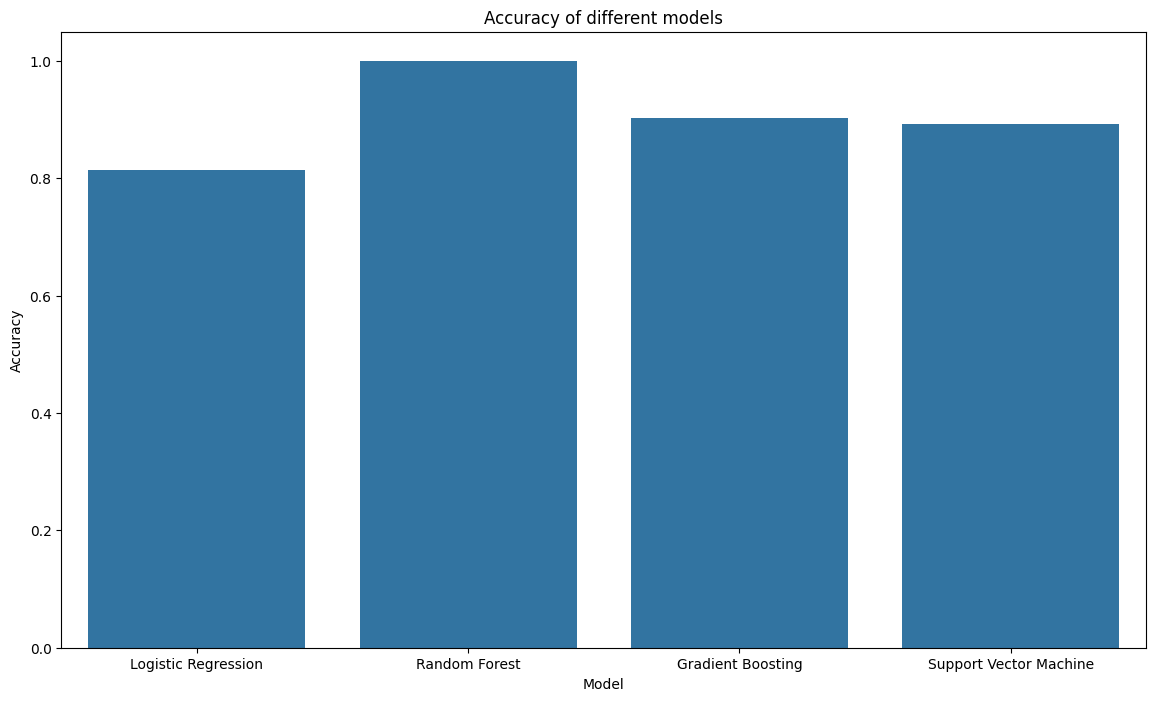

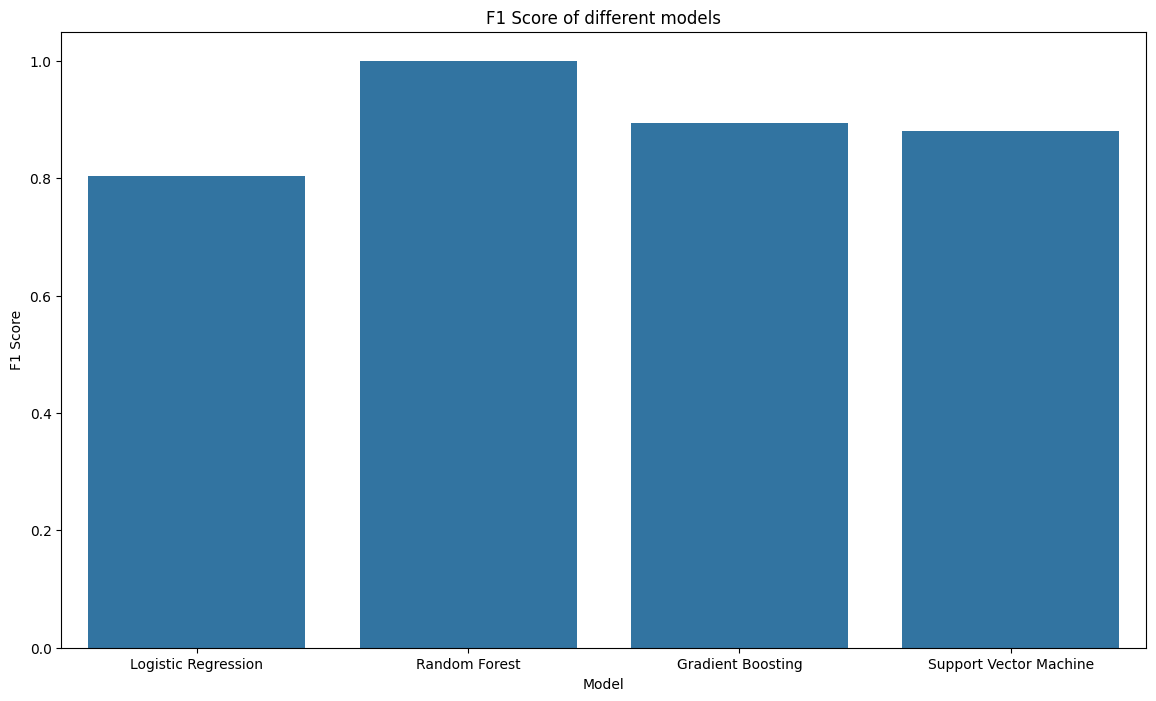

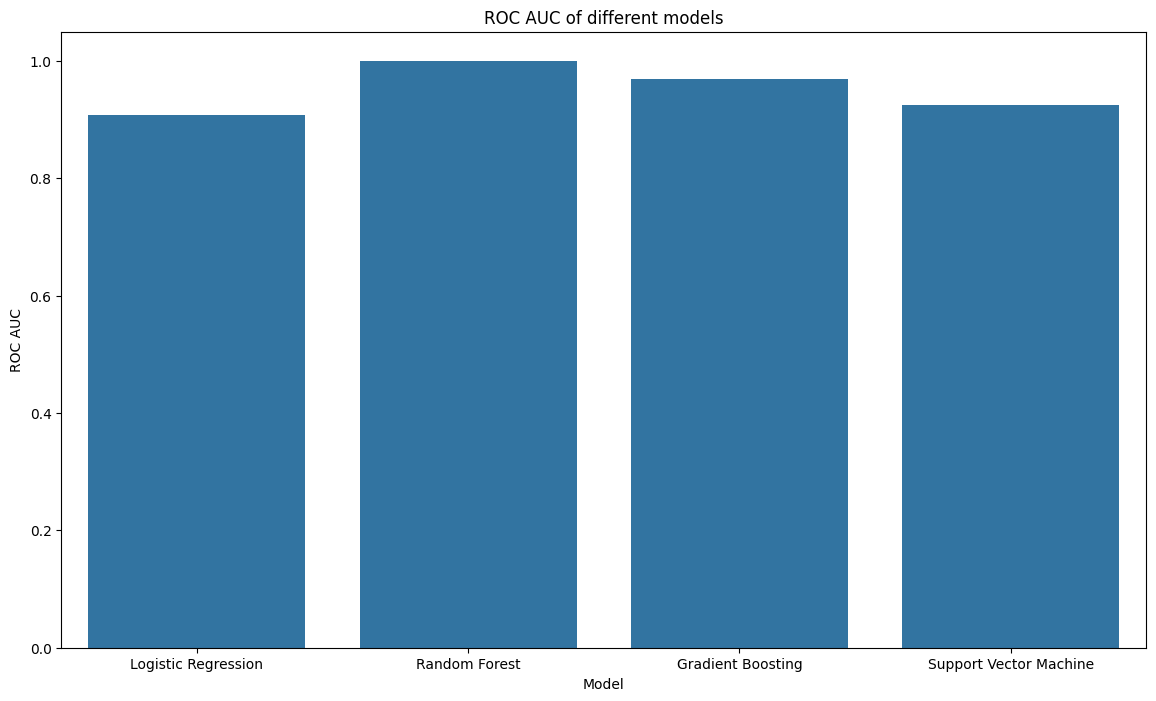

In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt

# Путь к папке, содержащей ваши CSV файлы
main_folder = 'F:\\Projects\\Python_projects\\Alex\\Data Science\\homework\\data'

# Список папок внутри главной папки
subfolders = ['idle', 'running', 'stairs', 'walking']

# Пустой список для хранения данных из файлов
all_data = []

# Цикл для загрузки данных из каждой папки
for folder in subfolders:
    folder_path = os.path.join(main_folder, folder)
    # Получение списка файлов в папке
    files = os.listdir(folder_path)
    # Цикл для загрузки данных из каждого файла CSV
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(folder_path, file)
            # Загрузка данных из CSV файла в DataFrame
            data = pd.read_csv(file_path)
            # Заполнение пропущенных значений средними значениями по столбцам
            data.fillna(data.mean(), inplace=True)
            # Добавление метки активности
            data['activity'] = folder
            # Добавление данных в список
            all_data.append(data)

# Объединение всех DataFrame в один общий DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# Убедимся, что данные загружены правильно
print(combined_data.head())
print(combined_data.isnull().sum())
print(combined_data.dtypes)
print(combined_data.describe())

# Подготовка данных для моделей
X = combined_data[['accelerometer_X', 'accelerometer_Y', 'accelerometer_Z']]
y = combined_data['activity']

# Разделение на тренировочные и тестовые данные
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение моделей
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machine': SVC(probability=True)
}

# Пустой список для хранения результатов
results = []

# Обучение и оценка моделей
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    
    # Binarize the output for ROC AUC
    lb = LabelBinarizer()
    y_test_binarized = lb.fit_transform(y_test)
    
    roc_auc = roc_auc_score(y_test_binarized, y_pred_proba, multi_class='ovr')
    
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'F1 Score': f1,
        'ROC AUC': roc_auc
    })

# Создание DataFrame для результатов
results_df = pd.DataFrame(results)
print(results_df)

# Визуализация результатов
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Accuracy of different models')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='F1 Score', data=results_df)
plt.title('F1 Score of different models')
plt.show()

plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='ROC AUC', data=results_df)
plt.title('ROC AUC of different models')
plt.show()


In [27]:
import os
import pandas as pd
import numpy as np
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Путь к папке, содержащей ваши CSV файлы
main_folder = 'F:\\Projects\\Python_projects\\Alex\\Data Science\\homework\\data'

# Список папок внутри главной папки
subfolders = ['idle', 'running', 'stairs', 'walking']

# Пустой список для хранения данных из файлов
all_data = []

# Цикл для загрузки данных из каждой папки
for folder in subfolders:
    folder_path = os.path.join(main_folder, folder)
    # Получение списка файлов в папке
    files = os.listdir(folder_path)
    # Цикл для загрузки данных из каждого файла CSV
    for file in files:
        if file.endswith('.csv'):
            file_path = os.path.join(folder_path, file)
            # Загрузка данных из CSV файла в DataFrame
            data = pd.read_csv(file_path)
            # Заполнение пропущенных значений средними значениями по столбцам
            data.fillna(data.mean(), inplace=True)
            # Добавление метки активности
            data['activity'] = folder
            # Добавление данных в список
            all_data.append(data)

# Объединение всех DataFrame в один общий DataFrame
combined_data = pd.concat(all_data, ignore_index=True)

# Функция для расчета временных признаков
def calculate_time_features(df):
    features = {}
    for axis in ['X', 'Y', 'Z']:
        column = f'accelerometer_{axis}'
        features[f'mean_{axis}'] = df[column].mean()
        features[f'std_{axis}'] = df[column].std()
        features[f'min_{axis}'] = df[column].min()
        features[f'max_{axis}'] = df[column].max()
        features[f'mad_{axis}'] = np.mean(np.abs(df[column] - df[column].mean()))
        features[f'energy_{axis}'] = np.sum(df[column]**2)
        features[f'sum_{axis}'] = np.sum(df[column])
        features[f'sum_square_{axis}'] = np.sum(df[column]**2)
        features[f'mean_square_{axis}'] = np.mean(df[column]**2)
        features[f'variance_{axis}'] = np.var(df[column])
        features[f'percentile_25_{axis}'] = np.percentile(df[column], 25)
        features[f'percentile_50_{axis}'] = np.percentile(df[column], 50)
        features[f'percentile_75_{axis}'] = np.percentile(df[column], 75)
    return pd.Series(features)

# Группировка данных по активности и расчет временных признаков
features_data = combined_data.groupby('activity', group_keys=False).apply(calculate_time_features).reset_index()

# Разделение набора данных на признаки (X) и целевую переменную (y)
X = features_data.drop('activity', axis=1)
y = features_data['activity']

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Определение всех возможных меток классов
all_labels = y.unique()

# Определение моделей
models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': OneVsRestClassifier(SVC(probability=True))
}

# Пустой список для хранения результатов classification_report
classification_reports = []

# Обучение и оценка моделей
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Генерация classification_report
    report = classification_report(y_test, y_pred, labels=all_labels, target_names=all_labels, output_dict=True, zero_division=0)
    
    # Добавление результатов в список
    classification_reports.append({
        'Model': model_name,
        'Report': report
    })

# Вывод classification_report
for report_data in classification_reports:
    print(f"Classification Report for {report_data['Model']}:")
    print(classification_report(y_test, model.predict(X_test), labels=all_labels, target_names=all_labels, zero_division=0))


Classification Report for Random Forest:
              precision    recall  f1-score   support

        idle       0.00      0.00      0.00       0.0
     running       0.00      0.00      0.00       1.0
      stairs       0.00      0.00      0.00       0.0
     walking       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0

Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

        idle       0.00      0.00      0.00       0.0
     running       0.00      0.00      0.00       1.0
      stairs       0.00      0.00      0.00       0.0
     walking       0.00      0.00      0.00       0.0

   micro avg       0.00      0.00      0.00       1.0
   macro avg       0.00      0.00      0.00       1.0
weighted avg       0.00      0.00      0.00       1.0



C:\Users\User\AppData\Local\Temp\ipykernel_16108\1415472985.py:61: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  features_data = combined_data.groupby('activity', group_keys=False).apply(calculate_time_features).reset_index()
